<a href="https://colab.research.google.com/github/arifjamal89/Applied-Social-Network-Analysis/blob/master/ChallengedNodesEdges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{('Node4', 'Node5'): Text(0.8535535037517548, -0.3535531779103991, 'POSTS'),
 ('Node5', 'Node1'): Text(0.0, 4.371138828673793e-08, 'MENTIONS'),
 ('Node5', 'Node2'): Text(0.14644664525985718, -0.3535533567243334, 'USING'),
 ('Node5', 'Node3'): Text(0.5000000059624403, -0.4999999125772234, 'CONTAINS'),
 ('Node5', 'Node7'): Text(0.49999983111688096, 0.5000000874227766, 'RETWEETS'),
 ('Node7', 'Node6'): Text(0.35355321565934617, 0.8535533845424652, 'REPLY TO'),
 ('Node8', 'Node5'): Text(0.14644670486450195, 0.35355359117453133, 'TAGS')}

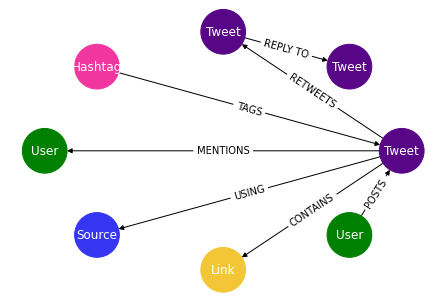

In [2]:
import networkx as nx
G = nx.DiGraph()

#add nodes
G.add_node("Node1")
G.add_node("Node2")
G.add_node("Node3")
G.add_node("Node4")
G.add_node("Node5")
G.add_node("Node6")
G.add_node("Node7")
G.add_node("Node8")

#add labels
labeldict = {}
labeldict["Node1"] = "User"
labeldict["Node2"] = "Source"
labeldict["Node3"] = "Link"
labeldict["Node4"] = "User"
labeldict["Node5"] = "Tweet"
labeldict["Node6"] = "Tweet"
labeldict["Node7"] = "Tweet"
labeldict["Node8"] = "Hashtag"

#define colours
color_map = {}
for node in G:
  if labeldict[node] == "User":
    color_map[node] = '#008000'
  elif labeldict[node] == 'Tweet':
    color_map[node] = '#580687'
  elif labeldict[node] == 'Link':
    color_map[node] = '#F2C636'
  elif labeldict[node] == 'Source':
    color_map[node] = '#3636F2'
  else: color_map[node] = '#F236A0'

color_val = [color_map.get(node) for node in G.nodes()]
#add edges / define relationships
G.add_edge('Node5', 'Node1',relation='MENTIONS')
G.add_edge('Node5', 'Node2',relation='USING')
G.add_edge('Node5', 'Node3',relation='CONTAINS')
G.add_edge('Node4', 'Node5',relation='POSTS')
G.add_edge('Node5', 'Node7',relation='RETWEETS')
G.add_edge('Node7', 'Node6',relation='REPLY TO')
G.add_edge('Node8', 'Node5',relation='TAGS')


nx.draw(G,pos=nx.shell_layout(G), font_color = 'white', labels=labeldict, with_labels = True,node_size=2000,width=1, node_color=color_val)
nx.draw_networkx_edge_labels(G, pos=nx.shell_layout(G),edge_labels=nx.get_edge_attributes(G,'relation'))

{('Hashtag', 'Tweet'): Text(-0.6545085608959198, -0.4755282839152457, 'TAGS'),
 ('Tweet', 'Link'): Text(-0.6545087099075317, 0.47552813688782436, 'CONTAINS'),
 ('Tweet', 'Source'): Text(-0.09549149870872498, 0.29389257828263027, 'USING'),
 ('Tweet', 'Tweet'): Text(-1.0, -8.742277657347586e-08, 'REPLY TO'),
 ('Tweet',
  'User'): Text(-0.09549137949943542, -0.2938925166937949, 'MENTIONS'),
 ('User', 'Tweet'): Text(-0.09549137949943542, -0.2938925166937949, 'POSTS')}

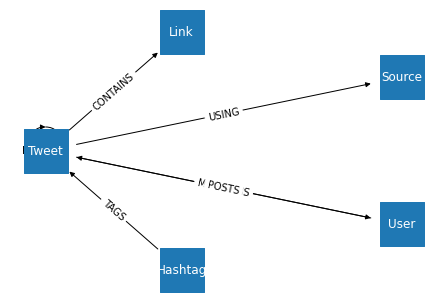

In [3]:
d = nx.DiGraph()
d.add_node('Tweet')
d.add_node('Hashtag')
d.add_node('User')
d.add_node('Source')
d.add_node('Link')

d.add_edge('Hashtag', 'Tweet',relation='TAGS')
d.add_edge('User', 'Tweet',relation='POSTS')
d.add_edge('Tweet', 'User',relation='MENTIONS')
d.add_edge('Tweet', 'Source',relation='USING')
d.add_edge('Tweet', 'Link',relation='CONTAINS')
d.add_edge('Tweet', 'Tweet',relation='RETWEETS')
d.add_edge('Tweet', 'Tweet',relation='REPLY TO')
#nx.draw_networkx(d, pos=nx.spring_layout(d),with_labels=True)

nx.draw(d,pos=nx.shell_layout(d),font_color = 'white', node_shape = 's', with_labels = True,node_size=2000,width=1)
nx.draw_networkx_edge_labels(d,pos=nx.shell_layout(d),edge_labels=nx.get_edge_attributes(d,'relation'))

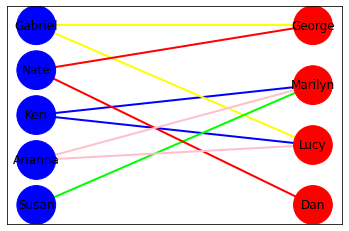

In [16]:
B=nx.Graph() 

B.add_nodes_from(['Keri','Gabriel','Susan','Nate','Arianna'],bipartite=0)
B.add_nodes_from(['Lucy','Dan','George','Marilyn'],bipartite=1) 
color_code = {'Keri':'blue','Gabriel':'yellow','Susan':'lime','Nate':'red','Arianna':'pink'}
B.add_edges_from([('Keri','Lucy'),('Keri','Marilyn'),('Gabriel','Lucy'),('Gabriel','George'), ('Susan','Marilyn'), ('Nate','Dan'),('Nate','George'), ('Arianna','Lucy'), ('Arianna','Marilyn')])

x=list(B.edges(data=True))
x1=[]
for i in x:
    x1.append(i[0])
x1

color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]


edge_color_list = [color_code[rel] for rel in x1]
nx.draw_networkx(B,pos = nx.drawing.layout.bipartite_layout(B, ['Keri','Gabriel','Susan','Nate','Arianna']), width = 2, edge_color= edge_color_list,node_color=color_list, node_size=1500)


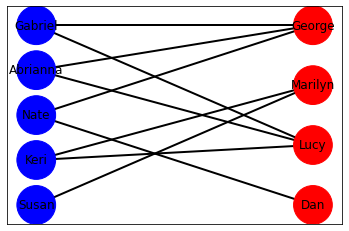

In [15]:
B=nx.Graph()

B.add_nodes_from(['Keri','Gabriel','Susan','Nate','Abrianna'],bipartite=0)
B.add_nodes_from(['Lucy','Dan','George','Marilyn'],bipartite=1) 

B.add_edges_from([('Keri','Lucy'),('Keri','Marilyn'),('Gabriel','Lucy'),('Gabriel','George'), ('Susan','Marilyn'), ('Nate','Dan'),('Nate','George'),('Nate', 'Dan'), ('Abrianna', 'Lucy'), ('Abrianna', 'George')])

color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]

nx.draw_networkx(B,pos = nx.drawing.layout.bipartite_layout(B, ['Keri','Gabriel','Susan','Nate','Abrianna']), width = 2, node_color=color_list, node_size=1500)

In [17]:
from networkx.algorithms import bipartite
C=nx.Graph() 
C.add_edges_from([('A',1),('B',1), ('C',1),('D',1),
                  ('H',1),('B',2),('C',2),('D',2), ('E',2),
                  ('G',2),('E',3),('F',3),('H',3),('J',3),('E',4),
                  ('I',4),('J',4)])

# CHALLENGE PAYMENT EXAMPLE